In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ete3 import Tree
from ete3.treeview import TreeStyle, NodeStyle, TextFace

# Barplot

In [6]:
# Load effect size and q-values
lfc = pd.read_csv("input/pipeline-test/ancombc-formula/lfc_slice.csv", sep=",")
qval = pd.read_csv("input/pipeline-test/ancombc-formula/q_val_slice.csv", sep=",")

In [7]:
lfc.head()

,id,(Intercept),conditioncancer
0,Bacteria;Bacillota_A;Clostridia;Lachnospirales...,-0.507104,1.229396
1,Bacteria;;;;;,11.026224,0.434792
2,;;;;;,9.237003,0.435261
3,Bacteria;Bacillota_A;Clostridia;Clostridiales;...,4.038373,-3.243878
4,Bacteria;Bacteroidota;Bacteroidia;Bacteroidale...,3.446904,5.498089


In [8]:
qval.head()

,id,(Intercept),conditioncancer
0,Bacteria;Bacillota_A;Clostridia;Lachnospirales...,1.000000e+00,1.00000
1,Bacteria;;;;;,1.503013e-67,1.00000
2,;;;;;,3.712855e-159,1.00000
3,Bacteria;Bacillota_A;Clostridia;Clostridiales;...,1.000000e+00,1.00000
4,Bacteria;Bacteroidota;Bacteroidia;Bacteroidale...,9.153419e-01,0.00255


In [9]:
# Merge
merged = lfc.merge(qval, on="id", suffixes=("_lfc", "_qval"))

# Filter based on effect size and q-value
filtered = merged[
    (merged["conditioncancer_lfc"].abs() > 1.5) &
    (merged["conditioncancer_qval"] < 0.1)
]

# Assign group direction (up/down)
filtered["group"] = filtered["conditioncancer_lfc"].apply(lambda x: "Cancer ↑" if x > 0 else "Control ↑")
color_map = {"Cancer ↑": "red", "Control ↑": "blue"}

filtered.head()

/var/folders/ch/9sqn9qpd5cbfpy3vzf372t9c0000gp/T/ipykernel_7894/2146919685.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["group"] = filtered["conditioncancer_lfc"].apply(lambda x: "Cancer ↑" if x > 0 else "Control ↑")


,id,(Intercept)_lfc,conditioncancer_lfc,(Intercept)_qval,conditioncancer_qval,group
4,Bacteria;Bacteroidota;Bacteroidia;Bacteroidale...,3.446904,5.498089,9.153419e-01,0.002550,Cancer ↑
11,Bacteria;Actinomycetota;Actinomycetes;Actinomy...,3.348624,-3.253431,1.810551e-02,0.044171,Control ↑
29,Bacteria;Pseudomonadota;Gammaproteobacteria;Xa...,6.228795,-5.086314,1.834929e-71,0.001585,Control ↑
49,Bacteria;Pseudomonadota;Gammaproteobacteria;Bu...,3.127192,-3.031998,8.371401e-03,0.024091,Control ↑
55,Bacteria;Bacteroidota;Bacteroidia;Flavobacteri...,5.906697,-4.918322,9.856245e-56,0.000002,Control ↑


/var/folders/ch/9sqn9qpd5cbfpy3vzf372t9c0000gp/T/ipykernel_7894/1669296851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.sort_values("conditioncancer_lfc", inplace=True)
/var/folders/ch/9sqn9qpd5cbfpy3vzf372t9c0000gp/T/ipykernel_7894/1669296851.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


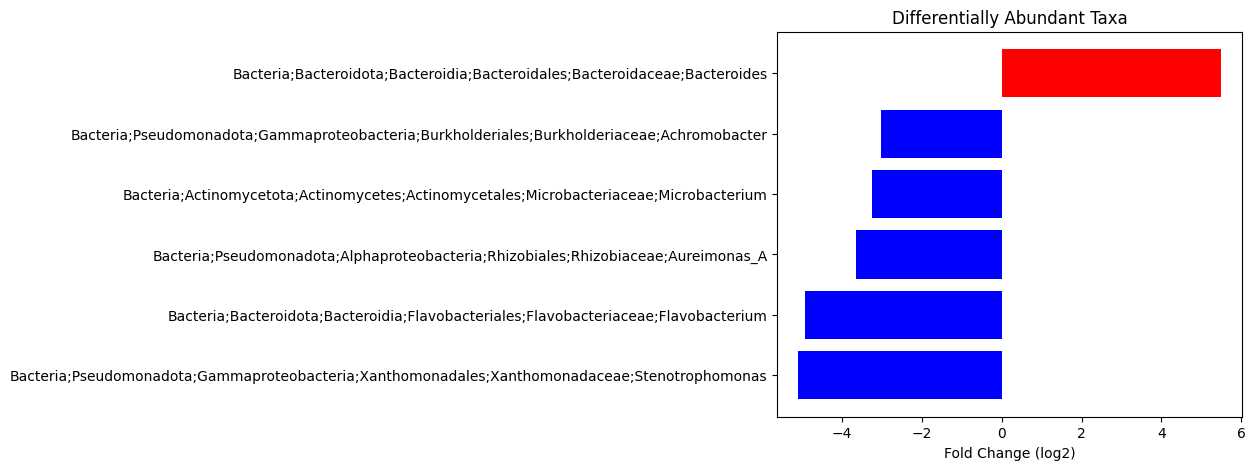

In [13]:
# Plot
filtered.sort_values("conditioncancer_lfc", inplace=True)
plt.figure(figsize=(6, 5))
plt.barh(
    filtered["id"],
    filtered["conditioncancer_lfc"],
    color=filtered["group"].map(color_map)
)
plt.xlabel("Fold Change (log2)")
plt.title("Differentially Abundant Taxa")
plt.tight_layout()
plt.show()


# Cladogram

In [29]:
# Load tree and data
tree = Tree("input/pipeline-test/ancombc-formula/tree.nwk", format=1)
lfc = pd.read_csv("input/pipeline-test/ancombc-formula/lfc_slice.csv", sep=",")
qval = pd.read_csv("input/pipeline-test/ancombc-formula/q_val_slice.csv", sep=",")
tax = pd.read_csv("input/pipeline-test/ancombc-formula/ASV_tax.gtdb_R07-RS207.tsv", sep="\t")

In [27]:
lfc.head()


,id,(Intercept),conditioncancer
0,Bacteria;Bacillota_A;Clostridia;Lachnospirales...,-0.507104,1.229396
1,Bacteria;;;;;,11.026224,0.434792
2,;;;;;,9.237003,0.435261
3,Bacteria;Bacillota_A;Clostridia;Clostridiales;...,4.038373,-3.243878
4,Bacteria;Bacteroidota;Bacteroidia;Bacteroidale...,3.446904,5.498089


In [28]:
qval.head()

,id,(Intercept),conditioncancer
0,Bacteria;Bacillota_A;Clostridia;Lachnospirales...,1.000000e+00,1.00000
1,Bacteria;;;;;,1.503013e-67,1.00000
2,;;;;;,3.712855e-159,1.00000
3,Bacteria;Bacillota_A;Clostridia;Clostridiales;...,1.000000e+00,1.00000
4,Bacteria;Bacteroidota;Bacteroidia;Bacteroidale...,9.153419e-01,0.00255


In [30]:
tax.head()

,ASV_ID,Kingdom,Phylum,Class,Order,Family,Genus,Species,confidence,sequence
0,0118d57337bccab8f376ba2917c68eb5,Bacteria,Bacteroidota,Ignavibacteria,Ignavibacteriales,Ignavibacteriaceae,NaN,NaN,0.67,TACGTAGGGGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCG...
1,02b4cbe5c2955ab2f66dc82cdf6dad64,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Burkholderiaceae,Aquabacterium,NaN,0.51,TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTG...
2,033b3477cc2e64b426992eee9236d268,Bacteria,Proteobacteria,Gammaproteobacteria,Legionellales,Legionellaceae,Legionella_C,NaN,0.56,TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGGGTG...
3,08bdc6c81f6b9daab3d132b54e1d45bc,Bacteria,Actinobacteriota,Actinomycetia,Mycobacteriales,Mycobacteriaceae,Rhodococcus,NaN,0.53,TACGTAGGGTGCAAGCGTTGTCCGGAATTACTGGGCGTAAAGAGTT...
4,08e82441af4098baf31f236034ea249b,Bacteria,Bdellovibrionota,Bdellovibrionia,Bdellovibrionales,Bdellovibrionaceae,Ga0074137,NaN,0.78,TACGAGGGGTCCTAGCGTTGTTCGGAATTATTGGGCGTAAAGAGTC...


In [31]:
df = lfc.join(qval, lsuffix="_lfc", rsuffix="_qval").join(tax)
df

,id_lfc,(Intercept)_lfc,conditioncancer_lfc,id_qval,(Intercept)_qval,conditioncancer_qval,ASV_ID,Kingdom,Phylum,Class,Order,Family,Genus,Species,confidence,sequence
0,Bacteria;Bacillota_A;Clostridia;Lachnospirales...,-0.507104,1.229396,Bacteria;Bacillota_A;Clostridia;Lachnospirales...,1.000000e+00,1.00000,0118d57337bccab8f376ba2917c68eb5,Bacteria,Bacteroidota,Ignavibacteria,Ignavibacteriales,Ignavibacteriaceae,NaN,NaN,0.67,TACGTAGGGGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCG...
1,Bacteria;;;;;,11.026224,0.434792,Bacteria;;;;;,1.503013e-67,1.00000,02b4cbe5c2955ab2f66dc82cdf6dad64,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Burkholderiaceae,Aquabacterium,NaN,0.51,TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTG...
2,;;;;;,9.237003,0.435261,;;;;;,3.712855e-159,1.00000,033b3477cc2e64b426992eee9236d268,Bacteria,Proteobacteria,Gammaproteobacteria,Legionellales,Legionellaceae,Legionella_C,NaN,0.56,TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGGGTG...
3,Bacteria;Bacillota_A;Clostridia;Clostridiales;...,4.038373,-3.243878,Bacteria;Bacillota_A;Clostridia;Clostridiales;...,1.000000e+00,1.00000,08bdc6c81f6b9daab3d132b54e1d45bc,Bacteria,Actinobacteriota,Actinomycetia,Mycobacteriales,Mycobacteriaceae,Rhodococcus,NaN,0.53,TACGTAGGGTGCAAGCGTTGTCCGGAATTACTGGGCGTAAAGAGTT...
4,Bacteria;Bacteroidota;Bacteroidia;Bacteroidale...,3.446904,5.498089,Bacteria;Bacteroidota;Bacteroidia;Bacteroidale...,9.153419e-01,0.00255,08e82441af4098baf31f236034ea249b,Bacteria,Bdellovibrionota,Bdellovibrionia,Bdellovibrionales,Bdellovibrionaceae,Ga0074137,NaN,0.78,TACGAGGGGTCCTAGCGTTGTTCGGAATTATTGGGCGTAAAGAGTC...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Bacteria;Bacillota;Bacilli;Lactobacillales;Str...,0.530373,-0.435180,Bacteria;Bacillota;Bacilli;Lactobacillales;Str...,1.000000e+00,1.00000,c1972519928146002b88a946471e938f,Bacteria,Patescibacteria,Saccharimonadia,Saccharimonadales,NaN,NaN,NaN,1.00,TACGTAGGACCCAAGCGTTATCCGGAGTGACTGGGCGTAAAGAGTT...
183,Bacteria;Pseudomonadota;Gammaproteobacteria;Ps...,0.186043,-0.090850,Bacteria;Pseudomonadota;Gammaproteobacteria;Ps...,1.000000e+00,1.00000,c1cd0bc45f873697ab9156e7147e8d76,Bacteria,Omnitrophota,Omnitrophia,Omnitrophales,01-FULL-45-10b,2-01-FULL-50-24,2-01-FULL-50-24 sp001804225,0.81,GACAGAGGTGGCGAGCGTTGTTCGGATTCATTGGGTGTAAAGGGTG...
184,Bacteria;Bacillota_A;Clostridia;Oscillospirale...,-0.507104,1.407368,Bacteria;Bacillota_A;Clostridia;Oscillospirale...,1.000000e+00,1.00000,c3c2da82d96e8b8ee73b62eb5edf06ab,Bacteria,Elusimicrobiota,Elusimicrobia,JACQPE01,JACQPE01,JACPAN01,JACPAN01 sp016180815,0.91,TACGTAGGTTGCAAGCGTTACTCGGATTCACTAGGCGTAAAGCGGG...
185,Bacteria;Fusobacteriota;Fusobacteriia;Fusobact...,0.047413,0.047780,Bacteria;Fusobacteriota;Fusobacteriia;Fusobact...,1.000000e+00,1.00000,c4dc084b83476f4b2c829da5b52fcb4d,Bacteria,Proteobacteria,Gammaproteobacteria,NaN,NaN,NaN,NaN,0.98,TACAGAGGGTGCAAGCGTTAATCGAAATTACTGGGCGTAAAGCGTG...


In [32]:
# === STYLING FUNCTION ===
def get_node_style(asv_id):
    style = NodeStyle()
    style["size"] = 0
    style["vt_line_color"] = "black"
    style["hz_line_color"] = "black"
    style["vt_line_width"] = 1
    style["hz_line_width"] = 1
    
    if asv_id in df.index:
        q = df.loc[asv_id].iloc["conditioncancer_qval"]  # q-value column
        lfc_val = df.loc[asv_id].iloc["conditioncancer_lfc"]  # LFC column

        # Color logic
        if q < 0.05:
            if lfc_val > 1:
                style["fgcolor"] = "red"
                style["size"] = 10
            elif lfc_val < -1:
                style["fgcolor"] = "blue"
                style["size"] = 10
            else:
                style["fgcolor"] = "gray"
        else:
            style["fgcolor"] = "lightgray"
            style["size"] = 5
    return style

In [33]:
# === APPLY STYLES ===
for leaf in tree.iter_leaves():
    leaf.set_style(get_node_style(leaf.name))

    # Optional: add genus name as label
    if leaf.name in df.index:
        genus = df.loc[leaf.name, "Genus"]
        name_face = TextFace(genus if pd.notna(genus) else leaf.name, fsize=10)
        leaf.add_face(name_face, column=0, position="aligned")

ValueError: Treeview module is disabled